In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from statsmodels.stats.power import TTestIndPower

In [2]:
#2. Análisis estadístico de datos continuos

# Se importa la tabla con los datos de competencia al coinocular un mutante con la cepa salvaje
# Cada columna hace referencia a los recuentos de colonias en el inóculo inicial ('entrada_') y final ('salida_') para la cepa mutante ('mut') y  salvaje('wt')
path='./tablas/competencia_individual.csv'
df = pd.read_csv(path)
display(df)

,entrada_mut,entrada_wt,salida_mut,salida_wt
0,128,112,45,82
1,81,61,46,93
2,76,63,61,117
3,105,102,63,81
4,58,49,39,81
5,180,162,50,113
6,109,103,35,72
7,93,81,58,108
8,69,55,63,125


In [3]:
# Se determina la proporción de mutantes en el inóculo y luego del ensayo de competencia
df['proporcion_entrada'] = df['entrada_mut']/(df['entrada_mut']+df['entrada_wt'])
df['proporcion_salida'] = df['salida_mut']/(df['salida_mut']+df['salida_wt'])
display(df)

,entrada_mut,entrada_wt,salida_mut,salida_wt,proporcion_entrada,proporcion_salida
0,128,112,45,82,0.533333,0.354331
1,81,61,46,93,0.570423,0.330935
2,76,63,61,117,0.546763,0.342697
3,105,102,63,81,0.507246,0.437500
4,58,49,39,81,0.542056,0.325000
5,180,162,50,113,0.526316,0.306748
6,109,103,35,72,0.514151,0.327103
7,93,81,58,108,0.534483,0.349398
8,69,55,63,125,0.556452,0.335106


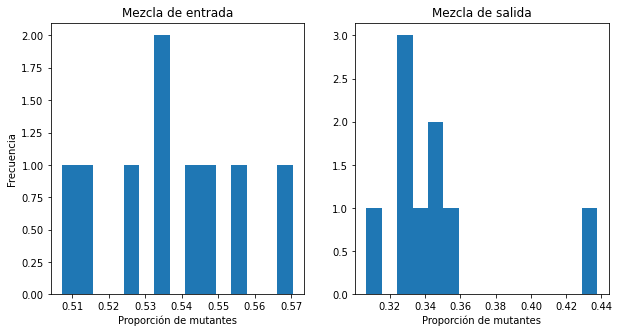

In [4]:
# Gráficos de distribución de la proporción en la mezcla de entrada y de salida
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['proporcion_entrada'], bins=15)
plt.xlabel('Proporción de mutantes')
plt.ylabel('Frecuencia')
plt.title('Mezcla de entrada')

plt.subplot(1, 2, 2)
plt.hist(df['proporcion_salida'], bins=15)
plt.xlabel('Proporción de mutantes')
plt.title('Mezcla de salida')
plt.savefig('./figuras/distribucion_porporciones_individual.jpg')
plt.show()

In [5]:
media_entrada = df['proporcion_entrada'].mean()
mediana_entrada = df['proporcion_entrada'].median()
rango_entrada = df['proporcion_entrada'].max()-df['proporcion_entrada'].min()
RI_entrada = df['proporcion_entrada'].quantile(0.75)-df['proporcion_entrada'].quantile(0.25)
std_entrada = df['proporcion_entrada'].std()
var_entrada = df['proporcion_entrada'].var()
cv_entrada = std_entrada/media_entrada
skew_entrada = df['proporcion_entrada'].skew()
kurt_entrada = df['proporcion_entrada'].kurt()

media_salida = df['proporcion_salida'].mean()
mediana_salida = df['proporcion_salida'].median()
rango_salida = df['proporcion_salida'].max()-df['proporcion_salida'].min()
RI_salida = df['proporcion_salida'].quantile(0.75)-df['proporcion_salida'].quantile(0.25)
std_salida = df['proporcion_salida'].std()
var_salida = df['proporcion_salida'].var()
cv_salida = std_salida/media_salida
skew_salida = df['proporcion_salida'].skew()
kurt_salida = df['proporcion_salida'].kurt()

index_medidas = ['media', 'mediana', 'rango', 'RI', 'desviación estandar', 'varianza', 'CV', 'skewness', 'kurtosis']
df_medidas = pd.DataFrame(index = index_medidas)
df_medidas['proporcion_entrada'] = [media_entrada, mediana_entrada, rango_entrada, RI_entrada, std_entrada, var_entrada, cv_entrada, skew_entrada, kurt_entrada]
df_medidas['proporcion_salida'] = [media_salida, mediana_salida, rango_salida, RI_salida, std_salida, var_salida, cv_salida, skew_salida, kurt_salida]

display(df_medidas)

,proporcion_entrada,proporcion_salida
media,0.536802,0.345424
mediana,0.534483,0.335106
rango,0.063176,0.130752
RI,0.020447,0.022295
desviación estandar,0.019866,0.037325
varianza,0.000395,0.001393
CV,0.037008,0.108057
skewness,0.165462,2.177929
kurtosis,-0.313466,5.704371


In [6]:
#test de homocedasticidad
print(ss.levene(df['proporcion_entrada'],df['proporcion_salida'], center='median', proportiontocut=0.05))


LeveneResult(statistic=0.34544747195205794, pvalue=0.5649054080181134)


In [7]:
#test de normalidad para entrada y salida
print(ss.shapiro(df['proporcion_entrada']))
print(ss.shapiro(df['proporcion_salida']))


ShapiroResult(statistic=0.9857801198959351, pvalue=0.9873412847518921)
ShapiroResult(statistic=0.7596855163574219, pvalue=0.007019908633083105)


In [8]:
#test de outliers
z = np.abs(ss.zscore(df['proporcion_salida'])) # threshold = 3
print(z)

0    0.253092
1    0.411726
2    0.077508
3    2.616474
4    0.580385
5    1.099030
6    0.520630
7    0.112910
8    0.293197
Name: proporcion_salida, dtype: float64


In [9]:
#Diferencia de intercuartilos para descartar outliers

df_salida = pd.DataFrame(df['proporcion_salida'])

Q1 = df_salida.quantile(0.02)
Q3 = df_salida.quantile(0.98)
IQR = Q3 - Q1
idx = ~((df_salida < (Q1 - 1.5 * IQR)) | (df_salida > (Q3 + 1.5 * IQR)))
print(df_salida[idx])

   proporcion_salida
0           0.354331
1           0.330935
2           0.342697
3           0.437500
4           0.325000
5           0.306748
6           0.327103
7           0.349398
8           0.335106


In [10]:
#Asumiendo normalidad, se calcula el tamaño muestral necesario

ttp = TTestIndPower()
n = ttp.solve_power(effect_size=0.15, alpha=0.05, power=0.8, ratio=1.0, alternative='two-sided')
print('tamaño muestral = ' + str(n))


tamaño muestral = 698.6381512056058


/home/eze/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/home/eze/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [11]:
#Test no parametrico de Kolmogorov-Smirnov para dos muestras
print(ss.ks_2samp(df['proporcion_entrada'], df['proporcion_salida'], alternative='two-sided', method='auto'))

KstestResult(statistic=1.0, pvalue=4.11353352529823e-05, statistic_location=0.4375, statistic_sign=-1)
